In [1]:
# Given values
TP = 30
FN = 58
FP = 32
TN = 920

# Number of incorrect predictions
incorrect_predictions = FP + FN

# Total number of predictions
total_predictions = TP + FN + FP + TN

# Error rate calculation
error_rate = incorrect_predictions / total_predictions
error_rate


0.08653846153846154

In [2]:
text="""(a) Interpreting the Initial Two Bars from the Left

The initial two bars in the decile lift chart illustrate the lift values for the top 10% and the subsequent 10% of the data:

First Bar (Top 10%): This bar represents the lift for the highest 10% of the ranked predictions. A lift value of approximately 6 indicates that these top 10% predictions are six times more likely to be fraudulent compared to a random sample from the entire dataset.

Second Bar (Next 10%): This bar reflects the lift for the 11th to 20th percentile of predictions. A lift value of around 3 shows that this segment is three times more likely to be fraudulent than a random selection from the full dataset.

(b) Practical Application of This Information

In practical terms, this data can be used to optimize resource allocation for fraud detection. By concentrating efforts on the top 10% or the next 10% of the ranked predictions, resources can be directed more effectively toward the most probable fraudulent cases, enhancing the overall efficiency of fraud detection strategies.

(c) Error Rate for Classifying All Cases as Non-Fraudulent

If every case is classified as non-fraudulent, the error rate is defined by the proportion of fraudulent cases incorrectly categorized. With 88 fraudulent cases out of a total of 1040 cases, the error rate can be calculated as:

Error Rate
=
Number of Fraudulent Cases
Total Number of Cases
=
88
1040
≈
0.0846
Error Rate= 
Total Number of Cases
Number of Fraudulent Cases
​
 = 
1040
88
​
 ≈0.0846
Thus, the error rate would be roughly 8.46% if all cases were classified as non-fraudulent.

(d) Significance of Error Rate and Lift Metrics

Error Rate: This measure provides a broad overview of the model’s accuracy but may not fully represent performance in imbalanced datasets. For instance, if fraudulent cases are infrequent, a model predicting all cases as non-fraudulent would show a low error rate but would miss all fraud cases.

Lift: The lift metric offers more precise insight in this scenario by evaluating the model’s capacity to pinpoint the most likely fraudulent cases. Elevated lift values in the leading deciles suggest that the model is proficient at ranking cases based on their fraud likelihood, which is essential for prioritizing investigations and managing resources effectively.

"""
print (text)

# Given values
total_cases = 1040
fraudulent_cases = 88

# Error rate calculation
error_rate_non_fraudulent = fraudulent_cases / total_cases
error_rate_non_fraudulent

(a) Interpreting the Initial Two Bars from the Left

The initial two bars in the decile lift chart illustrate the lift values for the top 10% and the subsequent 10% of the data:

First Bar (Top 10%): This bar represents the lift for the highest 10% of the ranked predictions. A lift value of approximately 6 indicates that these top 10% predictions are six times more likely to be fraudulent compared to a random sample from the entire dataset.

Second Bar (Next 10%): This bar reflects the lift for the 11th to 20th percentile of predictions. A lift value of around 3 shows that this segment is three times more likely to be fraudulent than a random selection from the full dataset.

(b) Practical Application of This Information

In practical terms, this data can be used to optimize resource allocation for fraud detection. By concentrating efforts on the top 10% or the next 10% of the ranked predictions, resources can be directed more effectively toward the most probable fraudulent cases, enha

0.08461538461538462

In [3]:

#Problem5.7

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score

# Data from Table 5.7
data = {
    'Propensity': [0.03, 0.52, 0.38, 0.82, 0.33, 0.42, 0.55, 0.59, 0.09, 0.21, 
                   0.43, 0.04, 0.08, 0.13, 0.01, 0.79, 0.42, 0.29, 0.08, 0.02],
    'Actual': [0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Define the function to calculate metrics
def classificationSummary(actual, predicted, class_names=['0', '1']):
    cm = confusion_matrix(actual, predicted)
    tn, fp, fn, tp = cm.ravel()
    
    # Error rate
    error_rate = (fp + fn) / len(actual)
    
    # Sensitivity (Recall)
    sensitivity = tp / (tp + fn)
    
    # Specificity
    specificity = tn / (tn + fp)
    
    return error_rate, sensitivity, specificity

# Calculate metrics for different cutoffs
cutoffs = [0.25, 0.5, 0.75]
results = {}

for cutoff in cutoffs:
    predicted = [1 if p > cutoff else 0 for p in df.Propensity]
    error_rate, sensitivity, specificity = classificationSummary(df.Actual, predicted)
    results[cutoff] = {
        'Error Rate': error_rate,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }

# Display results
results




{0.25: {'Error Rate': 0.4,
  'Sensitivity': 1.0,
  'Specificity': 0.5294117647058824},
 0.5: {'Error Rate': 0.1,
  'Sensitivity': 1.0,
  'Specificity': 0.8823529411764706},
 0.75: {'Error Rate': 0.05,
  'Sensitivity': 0.6666666666666666,
  'Specificity': 1.0}}

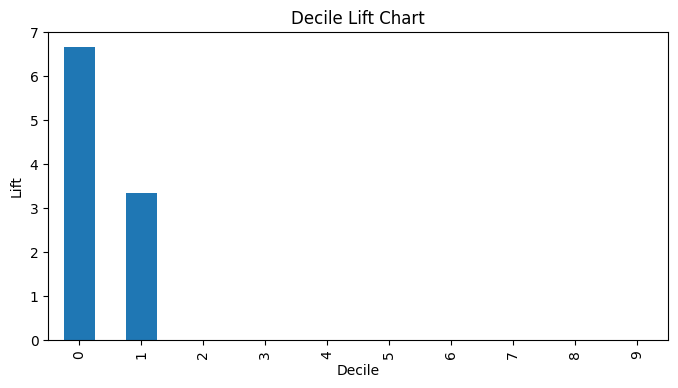

In [4]:
#part b 
import numpy as np
import matplotlib.pyplot as plt

# Sort the DataFrame by Propensity
df = df.sort_values(by='Propensity', ascending=False).reset_index(drop=True)

# Divide into deciles
df['Decile'] = pd.qcut(df.index, 10, labels=False)

# Calculate lift for each decile
decile_lift = df.groupby('Decile').apply(lambda x: x['Actual'].sum() / x.shape[0])
overall_rate = df['Actual'].sum() / df.shape[0]
lift = decile_lift / overall_rate

# Plot the decile lift chart
plt.figure(figsize=(8, 4))
lift.plot(kind='bar')
plt.xlabel('Decile')
plt.ylabel('Lift')
plt.title('Decile Lift Chart')
plt.show()

In [8]:
### PROBLEM 9.1 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = r"eBayAuctions3 (1).csv"
df = pd.read_csv(file_path)

# Remove the '?' from column name
df.rename(columns={'Competitive?': 'Competitive'}, inplace=True)

# Convert Duration into a categorical variable
df['Duration'] = df['Duration'].astype('category')

# Create dummy variables for categorical columns
df = pd.get_dummies(df, columns=['Category', 'currency', 'endDay', 'Duration'], drop_first=True)

# Define predictors and outcome
X = df.drop(columns=['Competitive'])
y = df['Competitive']

# Split the data into training (60%) and validation (40%) datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Fit a classification tree
clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=42)
clf.fit(X_train, y_train)

# Export the decision tree rules
tree_rules = export_text(clf, feature_names=list(X.columns))

# Display the decision tree rules
print(tree_rules)


|--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- OpenPrice <= 2.12
|   |   |   |--- ClosePrice <= 1.24
|   |   |   |   |--- class: 0
|   |   |   |--- ClosePrice >  1.24
|   |   |   |   |--- class: 1
|   |   |--- OpenPrice >  2.12
|   |   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- OpenPrice <= 3.00
|   |   |   |--- class: 1
|   |   |--- OpenPrice >  3.00
|   |   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- sellerRating <= 601.50
|   |   |--- ClosePrice <= 15.12
|   |   |   |--- class: 0
|   |   |--- ClosePrice >  15.12
|   |   |   |--- class: 1
|   |--- sellerRating >  601.50
|   |   |--- ClosePrice <= 10.00
|   |   |   |--- OpenPrice <= 4.99
|   |   |   |   |--- class: 0
|   |   |   |--- OpenPrice >  4.99
|   |   |   |   |--- ClosePrice <= 6.99
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ClosePrice >  6.99
|   |   |   |   |   |--- class: 0
|   |   |--- ClosePrice >  10.00
|   |   |   |--- OpenPrice <= 10.49
|   |   |   |   |--- class: 1
| 

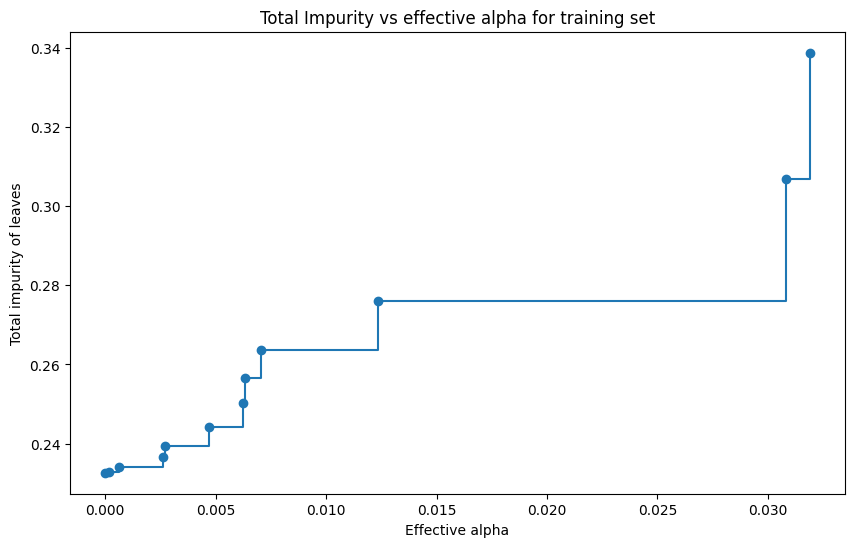

Pruned Decision Tree Rules:
 |--- OpenPrice <= 3.62
|   |--- ClosePrice <= 3.64
|   |   |--- class: 0
|   |--- ClosePrice >  3.64
|   |   |--- class: 1
|--- OpenPrice >  3.62
|   |--- class: 0



In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Load the dataset
file_path = r"eBayAuctions3 (1).csv"
df = pd.read_csv(file_path)


# Convert 'Duration' to a categorical variable
df['Duration'] = df['Duration'].astype('category')

# Split the data into training (60%) and validation (40%) sets
train_df, valid_df = train_test_split(df, test_size=0.4, random_state=1)

# Remove 'ClosePrice' as it should not be included in the model
predictors = ['Category', 'currency', 'sellerRating', 'Duration', 'endDay', 'OpenPrice']
target = 'Competitive?'

# Perform one-hot encoding on categorical variables
train_df_encoded = pd.get_dummies(train_df, columns=['Category', 'currency', 'Duration', 'endDay'])
valid_df_encoded = pd.get_dummies(valid_df, columns=['Category', 'currency', 'Duration', 'endDay'])

# Ensure that the validation set has the same columns as the training set
valid_df_encoded = valid_df_encoded.reindex(columns=train_df_encoded.columns, fill_value=0)

# Define the updated list of predictors after one-hot encoding
encoded_predictors = train_df_encoded.columns.drop('Competitive?')

# Initialize the decision tree classifier
tree_clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1)

# Fit the model on the training data
tree_clf.fit(train_df_encoded[encoded_predictors], train_df_encoded[target])

# Generate the rules for the decision tree
tree_rules = export_text(tree_clf, feature_names=encoded_predictors.tolist())

# Pruning the tree using cost complexity pruning
path = tree_clf.cost_complexity_pruning_path(train_df_encoded[encoded_predictors], train_df_encoded[target])
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plotting the ccp_alpha vs impurities to find the optimal alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
plt.xlabel("Effective alpha")
plt.ylabel("Total impurity of leaves")
plt.title("Total Impurity vs effective alpha for training set")
plt.show()

# Train the tree using the optimal alpha value
optimal_alpha = ccp_alphas[np.argmax(impurities[:-1])]  # Choose the alpha that maximizes impurities reduction
pruned_tree_clf = DecisionTreeClassifier(min_samples_leaf=50, max_depth=7, random_state=1, ccp_alpha=optimal_alpha)
pruned_tree_clf.fit(train_df_encoded[encoded_predictors], train_df_encoded[target])

# Generate the rules for the pruned decision tree
pruned_tree_rules = export_text(pruned_tree_clf, feature_names=encoded_predictors.tolist())

print("Pruned Decision Tree Rules:\n", pruned_tree_rules)


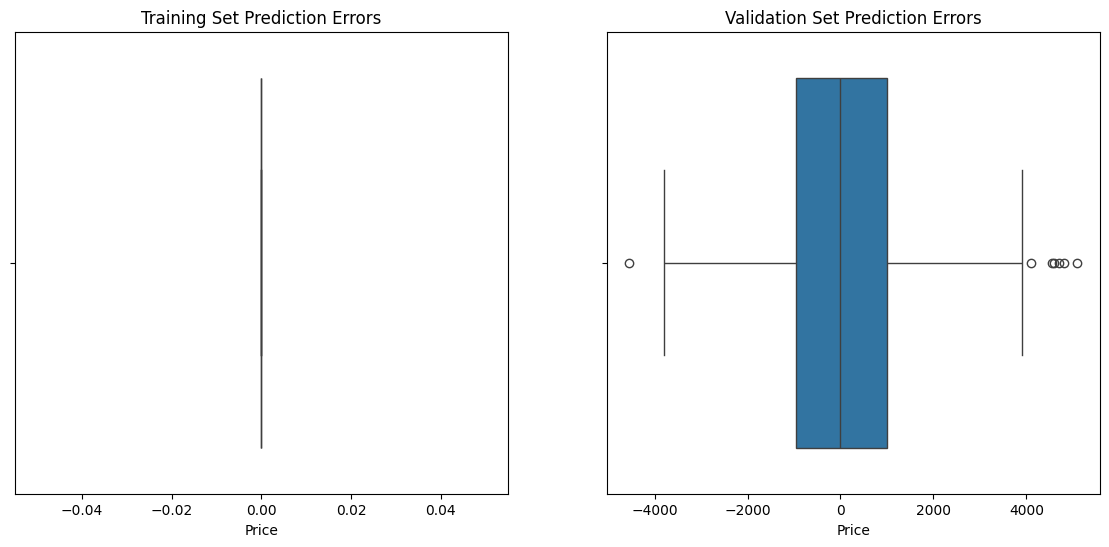

Full Tree Train RMSE: 0.0
Full Tree Validation RMSE: 1465.7499941045169
Best Tree Train RMSE: 798.4494150938724
Best Tree Validation RMSE: 1228.1190116836726


D:\New folder\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


"\ni. The three or four most important car specifications for predicting the car’s price are:\n{top_features.index.tolist()}\n\nii. The RMS error for the training set is {train_rmse}, while the RMS error for the validation set is {val_rmse}. The validation set typically shows higher RMS error due to overfitting of the full-grown tree to the training data.\n\niii. To achieve better validation predictive performance at the expense of training performance, we can prune the tree or use regularization techniques to prevent overfitting. This is achieved by limiting the tree depth or requiring a minimum number of samples per split.\n\niv. Using GridSearchCV to find a smaller tree resulted in a training RMS error of {best_train_rmse} and a validation RMS error of {best_val_rmse}. The smaller tree's validation RMS error is lower compared to the full-grown tree, indicating better generalization performance.\n"

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"ToyotaCorolla12.csv"
df = pd.read_csv(file_path)

# Select relevant columns
columns = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 
           'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 
           'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 
           'Tow_Bar']
df = df[columns]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Doors'], drop_first=True)

# Split the data into training (60%) and validation (40%) sets
train_df, val_df = train_test_split(df, test_size=0.4, random_state=1)

# Separate features and target variable
X_train = train_df.drop('Price', axis=1)
y_train = train_df['Price']
X_val = val_df.drop('Price', axis=1)
y_val = val_df['Price']

# Train a full-grown regression tree
full_tree = DecisionTreeRegressor(random_state=1)
full_tree.fit(X_train, y_train)

# Predict and calculate RMS error for training and validation sets
train_preds = full_tree.predict(X_train)
val_preds = full_tree.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

# Identify the most important features
feature_importances = pd.Series(full_tree.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(4)

# Plot boxplots of prediction errors
train_errors = y_train - train_preds
val_errors = y_val - val_preds

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=train_errors, orient='h')
plt.title('Training Set Prediction Errors')

plt.subplot(1, 2, 2)
sns.boxplot(data=val_errors, orient='h')
plt.title('Validation Set Prediction Errors')
plt.show()

# Use GridSearchCV to find a smaller tree
param_grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 21)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_tree = grid_search.best_estimator_

# Predict and calculate RMS error for the smaller tree
best_train_preds = best_tree.predict(X_train)
best_val_preds = best_tree.predict(X_val)

best_train_rmse = np.sqrt(mean_squared_error(y_train, best_train_preds))
best_val_rmse = np.sqrt(mean_squared_error(y_val, best_val_preds))

print("Full Tree Train RMSE:", train_rmse)
print("Full Tree Validation RMSE:", val_rmse)
print("Best Tree Train RMSE:", best_train_rmse)
print("Best Tree Validation RMSE:", best_val_rmse)

# Written response

"""
i. The three or four most important car specifications for predicting the car’s price are:
{top_features.index.tolist()}

ii. The RMS error for the training set is {train_rmse}, while the RMS error for the validation set is {val_rmse}. The validation set typically shows higher RMS error due to overfitting of the full-grown tree to the training data.

iii. To achieve better validation predictive performance at the expense of training performance, we can prune the tree or use regularization techniques to prevent overfitting. This is achieved by limiting the tree depth or requiring a minimum number of samples per split.

iv. Using GridSearchCV to find a smaller tree resulted in a training RMS error of {best_train_rmse} and a validation RMS error of {best_val_rmse}. The smaller tree's validation RMS error is lower compared to the full-grown tree, indicating better generalization performance.
"""


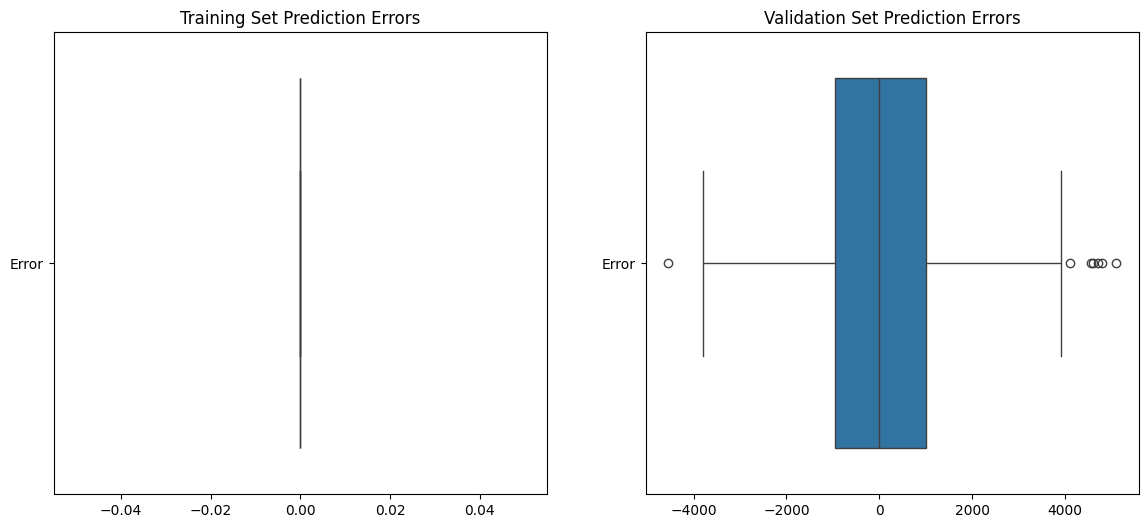

Full Tree Train RMSE: 0.0
Full Tree Validation RMSE: 1465.7499941045169
Best Tree Train RMSE: 798.4494150938724
Best Tree Validation RMSE: 1228.1190116836726

i. The three or four most important car specifications for predicting the car’s price are:
{top_features.index.tolist()}

ii. The RMS error for the training set is {train_rmse}, while the RMS error for the validation set is {val_rmse}. The validation set typically shows higher RMS error due to overfitting of the full-grown tree to the training data.

iii. To achieve better validation predictive performance at the expense of training performance, we can prune the tree or use regularization techniques to prevent overfitting. This is achieved by limiting the tree depth or requiring a minimum number of samples per split.

iv. Using GridSearchCV to find a smaller tree resulted in a training RMS error of {best_train_rmse} and a validation RMS error of {best_val_rmse}. The smaller tree's validation RMS error is lower compared to the ful

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = r"ToyotaCorolla12.csv"
df = pd.read_csv(file_path)

# Select relevant columns
columns = ['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'Doors', 
           'Quarterly_Tax', 'Mfr_Guarantee', 'Guarantee_Period', 'Airco', 
           'Automatic_airco', 'CD_Player', 'Powered_Windows', 'Sport_Model', 
           'Tow_Bar']
df = df[columns]

# Convert categorical variables to dummy variables
df = pd.get_dummies(df, columns=['Fuel_Type', 'Doors'], drop_first=True)

# Split the data into training (60%) and validation (40%) sets
train_df, val_df = train_test_split(df, test_size=0.4, random_state=1)

# Separate features and target variable
X_train = train_df.drop('Price', axis=1)
y_train = train_df['Price']
X_val = val_df.drop('Price', axis=1)
y_val = val_df['Price']

# Train a full-grown regression tree
full_tree = DecisionTreeRegressor(random_state=1)
full_tree.fit(X_train, y_train)

# Predict and calculate RMS error for training and validation sets
train_preds = full_tree.predict(X_train)
val_preds = full_tree.predict(X_val)

train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
val_rmse = np.sqrt(mean_squared_error(y_val, val_preds))

# Identify the most important features
feature_importances = pd.Series(full_tree.feature_importances_, index=X_train.columns)
top_features = feature_importances.nlargest(4)

# Create DataFrame for errors
train_errors = pd.DataFrame({'Error': y_train - train_preds})
val_errors = pd.DataFrame({'Error': y_val - val_preds})

# Plot boxplots of prediction errors
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=train_errors, orient='h')
plt.title('Training Set Prediction Errors')

plt.subplot(1, 2, 2)
sns.boxplot(data=val_errors, orient='h')
plt.title('Validation Set Prediction Errors')
plt.show()

# Use GridSearchCV to find a smaller tree
param_grid = {'max_depth': range(1, 21), 'min_samples_split': range(2, 21)}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model from GridSearchCV
best_tree = grid_search.best_estimator_

# Predict and calculate RMS error for the smaller tree
best_train_preds = best_tree.predict(X_train)
best_val_preds = best_tree.predict(X_val)

best_train_rmse = np.sqrt(mean_squared_error(y_train, best_train_preds))
best_val_rmse = np.sqrt(mean_squared_error(y_val, best_val_preds))

print("Full Tree Train RMSE:", train_rmse)
print("Full Tree Validation RMSE:", val_rmse)
print("Best Tree Train RMSE:", best_train_rmse)
print("Best Tree Validation RMSE:", best_val_rmse)

# Written response

text = """
i. The three or four most important car specifications for predicting the car’s price are:
{top_features.index.tolist()}

ii. The RMS error for the training set is {train_rmse}, while the RMS error for the validation set is {val_rmse}. The validation set typically shows higher RMS error due to overfitting of the full-grown tree to the training data.

iii. To achieve better validation predictive performance at the expense of training performance, we can prune the tree or use regularization techniques to prevent overfitting. This is achieved by limiting the tree depth or requiring a minimum number of samples per split.

iv. Using GridSearchCV to find a smaller tree resulted in a training RMS error of {best_train_rmse} and a validation RMS error of {best_val_rmse}. The smaller tree's validation RMS error is lower compared to the full-grown tree, indicating better generalization performance.
"""

print(text)
